In [56]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [57]:
#Load the dataset
cars = pd.read_csv("/content/ToyotaCorolla - MLR.csv")
cars.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [58]:
#Obtain Summary Statistics
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


All the columns have the correct datatype, so there is no need to modify.

In [59]:
cars.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


The values are in expected ranges.

In [60]:
#Check for missing values
cars.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


Since there are no NA values, there is no need to employ imputation or deletion.

In [61]:
#Rename Age Column
cars = cars.rename({'Age_08_04':'Age'}, axis=1)
cars.head()

,Price,Age,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


#Correlation Matrix & Visualization

In [62]:
cars_numerical = cars.drop(['Fuel_Type'],axis=1)
cars_numerical.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,0,2000,3,4,5,1165
1,13750,23,72937,90,0,2000,3,4,5,1165
2,13950,24,41711,90,0,2000,3,4,5,1165
3,14950,26,48000,90,0,2000,3,4,5,1165
4,13750,30,38500,90,0,2000,3,4,5,1170


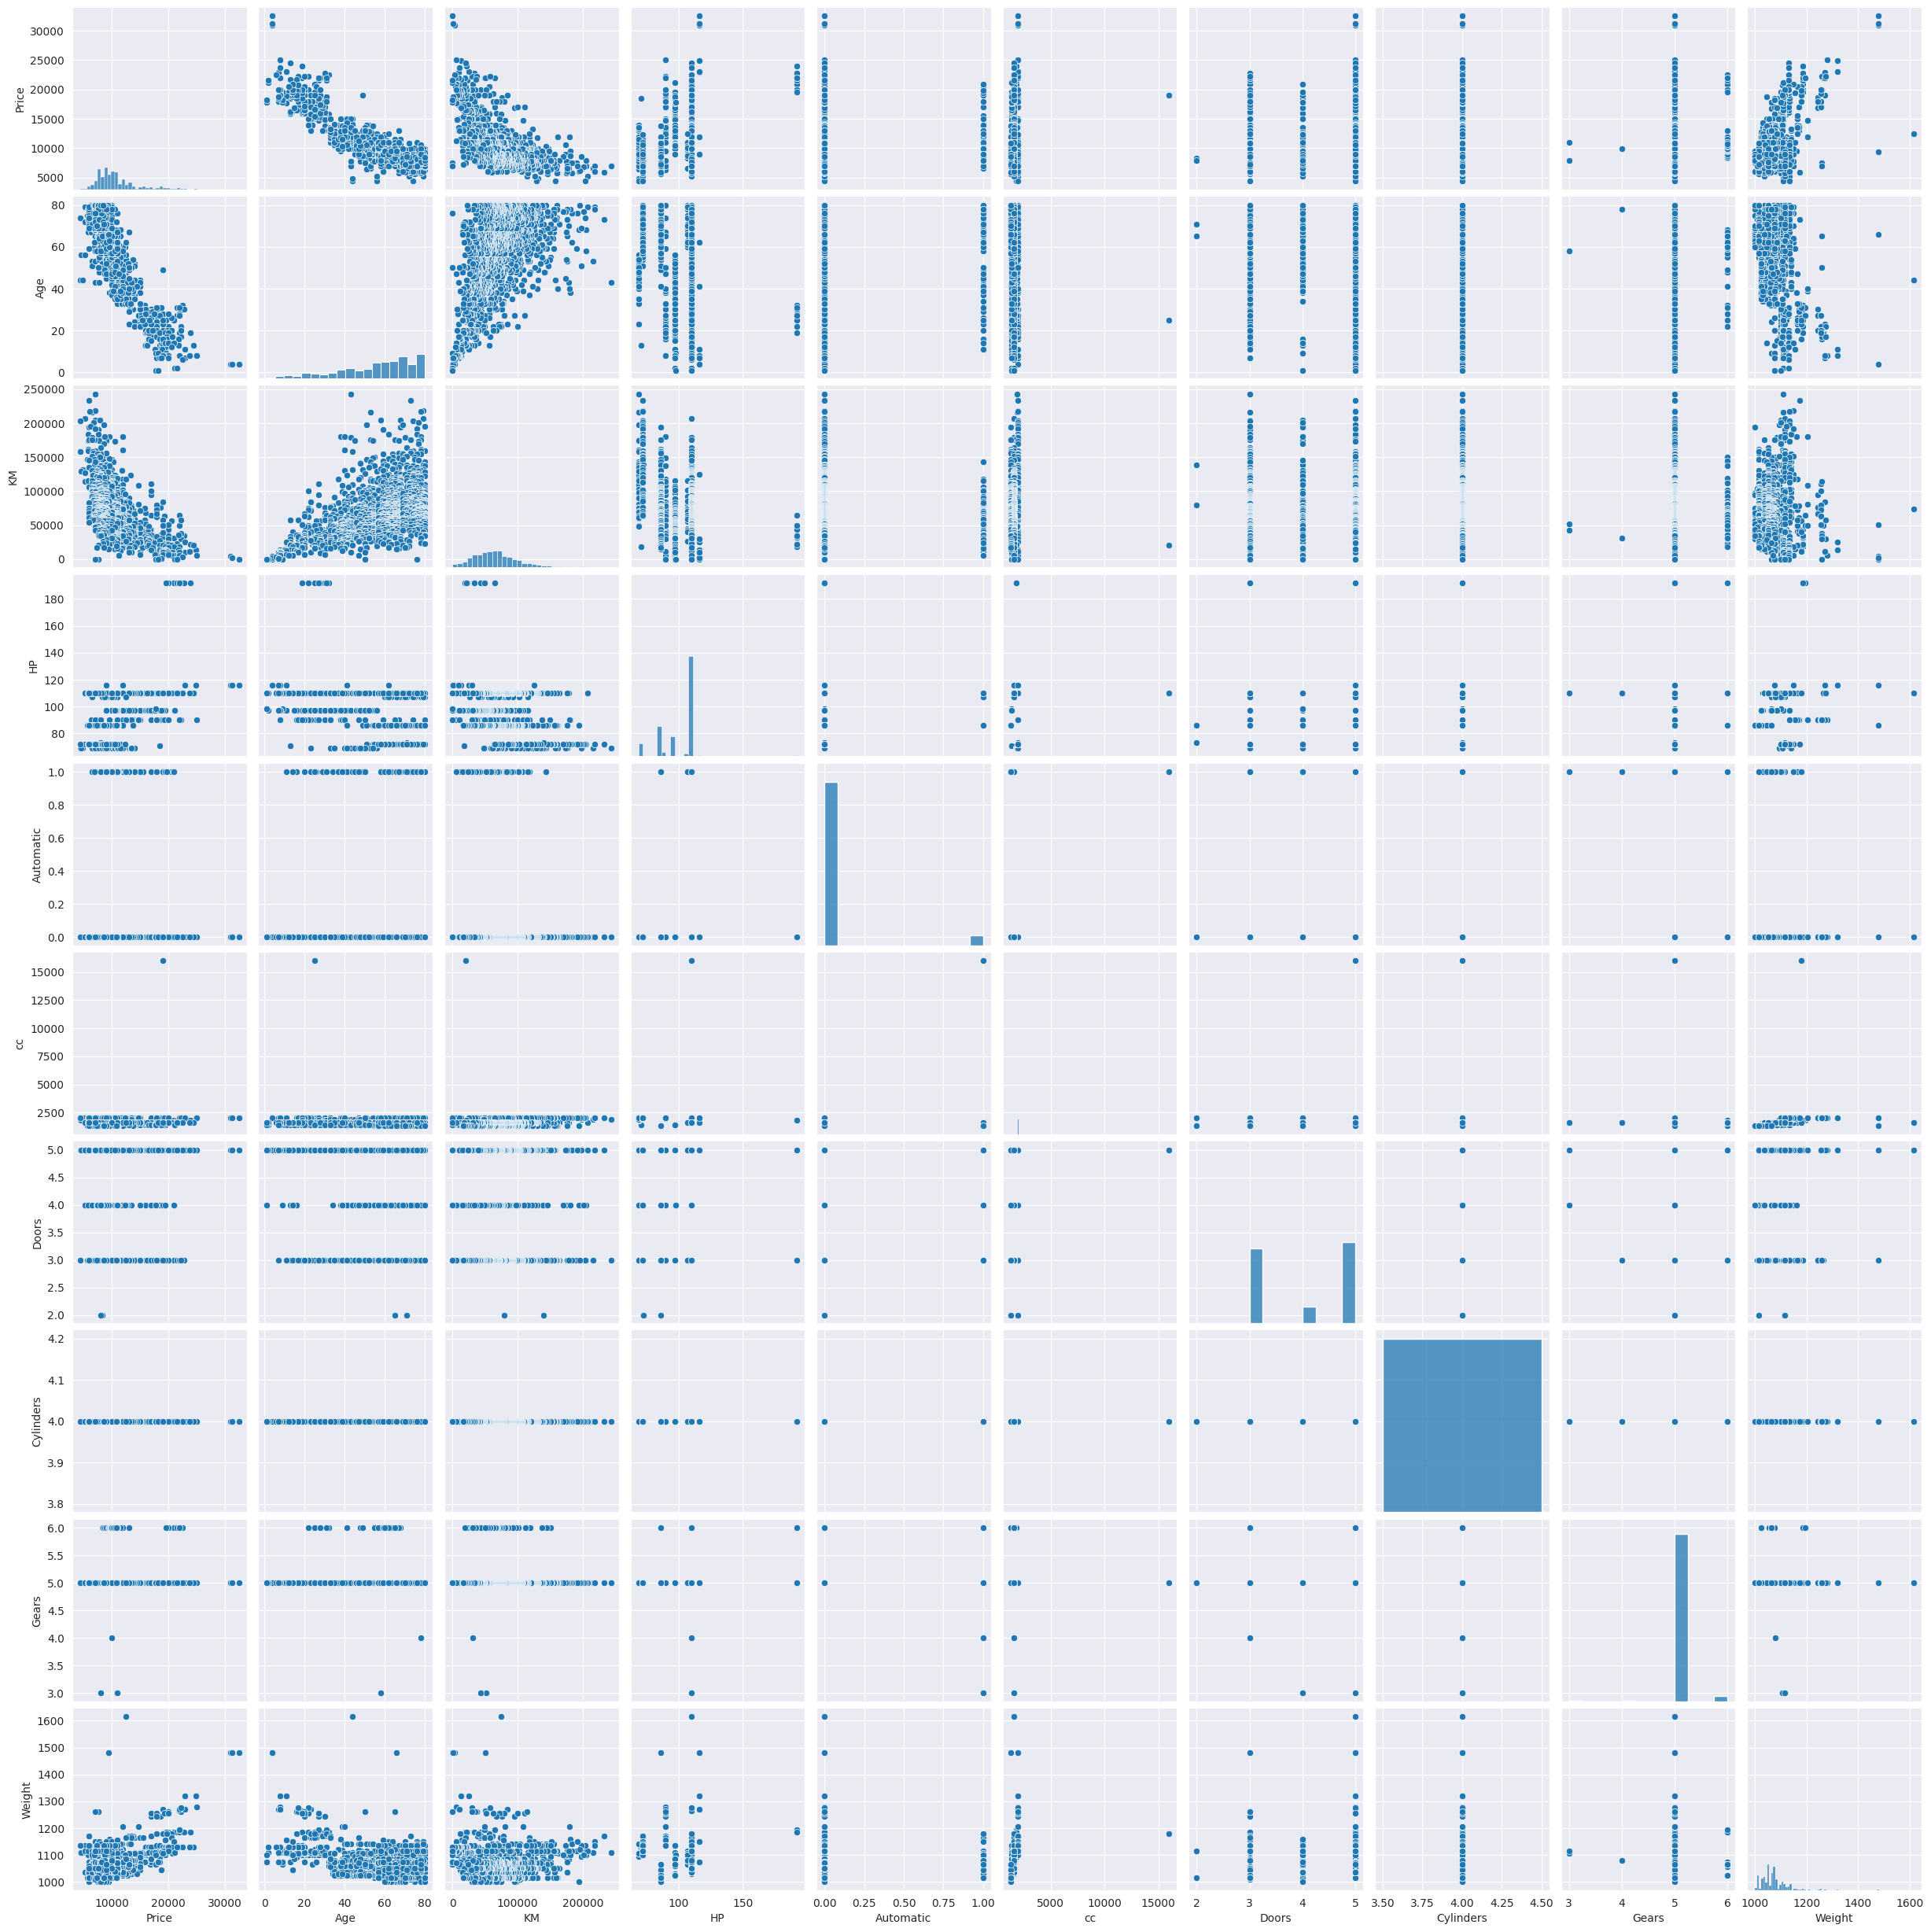

In [63]:
#Visualize pairplots and and histograms
sns.set_style(style='darkgrid')
sns.pairplot(cars_numerical)
plt.show()

Price seems to have linear relationships with Age, KM and Weight.
Age seems to have linear relationship with Price and KM.
KM seems to have linear relationship with Price and Age.

              Price       Age        KM        HP  Automatic        cc  \
Price      1.000000 -0.876590 -0.569960  0.314990   0.033081  0.126389   
Age       -0.876590  1.000000  0.505672 -0.156622   0.031717 -0.098084   
KM        -0.569960  0.505672  1.000000 -0.333538  -0.081854  0.102683   
HP         0.314990 -0.156622 -0.333538  1.000000   0.013144  0.035856   
Automatic  0.033081  0.031717 -0.081854  0.013144   1.000000  0.066740   
cc         0.126389 -0.098084  0.102683  0.035856   0.066740  1.000000   
Doors      0.185326 -0.148359 -0.036197  0.092424  -0.027654  0.079903   
Cylinders       NaN       NaN       NaN       NaN        NaN       NaN   
Gears      0.063104 -0.005364  0.015023  0.209477  -0.098555  0.014629   
Weight     0.581198 -0.470253 -0.028598  0.089614   0.057249  0.335637   

              Doors  Cylinders     Gears    Weight  
Price      0.185326        NaN  0.063104  0.581198  
Age       -0.148359        NaN -0.005364 -0.470253  
KM        -0.036197       

<Axes: >

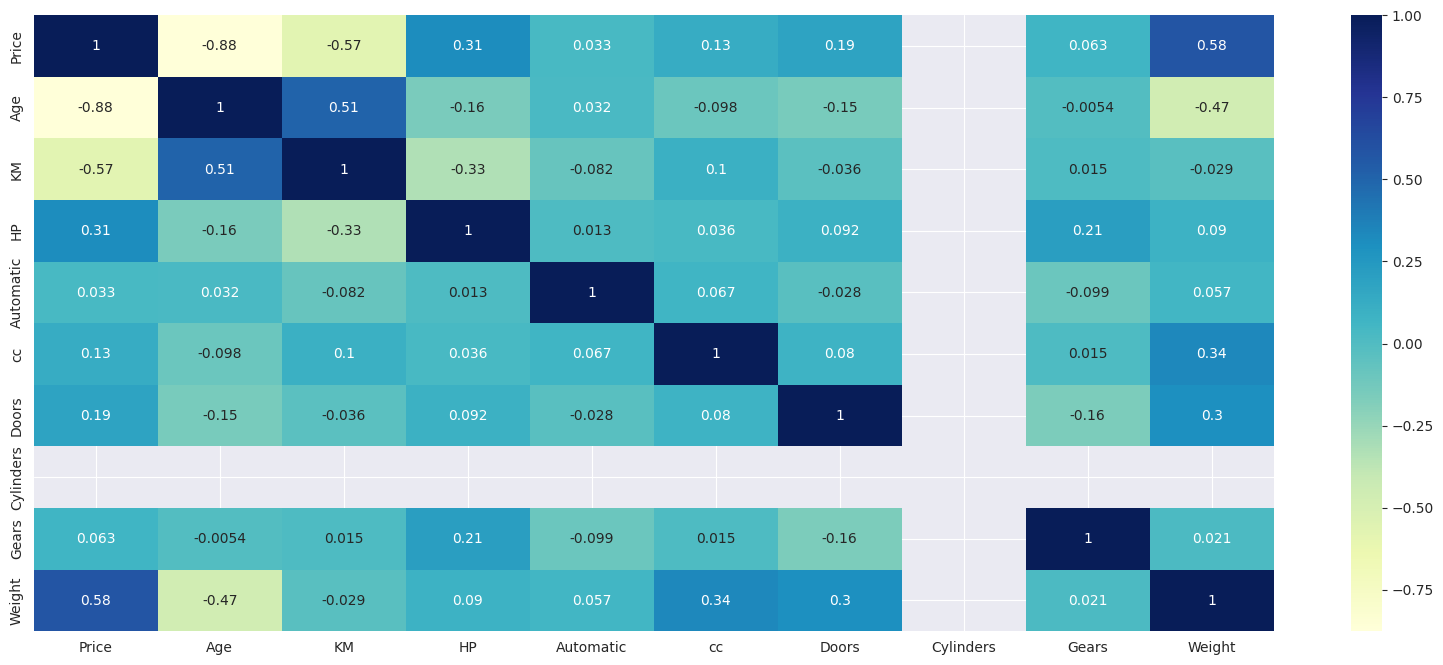

In [64]:
#Correlation Matrix
corr = cars_numerical.corr()
print(corr)
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, cmap='YlGnBu')

Correlation Coefficient between:


*   Price and Age: -0.88
*   Price and KM: -0.57
*   Price and Weight: 0.58
*   Age and KM: 0.51

#Preprocessing data for MLR

In [65]:
#Create dummies for categorical variables
cars = pd.get_dummies(cars, drop_first=True)
cars.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False


Price is the dependent variable in this scenario. Hence it is the Y variable (target variable).

I am splitting the data into train and test before scaling only the X variables. This is because:



*   So that the predicted output Y is in the original scale of Price.
*   Prevents data leakage so that the X_train and X_test datasets are scaled separate of each other. This prevents overfitting.



In [66]:
from sklearn.model_selection import train_test_split

# Split first
X = cars.drop(columns=['Price']) #Obtain X variables as a pandas DataFrame
y = cars['Price'] #Obtain y variable price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
#Scale X variables
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)
cars.head()
print(X_test_scaled)

[[ 0.32969109 -0.25437232 -1.02708007 ... -0.74551807 -0.35735329
   0.38321423]
 [ 0.64944782 -0.19405395  0.59013961 ... -0.74551807 -0.35735329
   0.38321423]
 [-0.84275022 -0.80214697  0.59013961 ...  0.13905584 -0.35735329
   0.38321423]
 ...
 [ 1.28896126  0.07587937  0.59013961 ... -0.05751614 -0.35735329
   0.38321423]
 [ 0.38298388 -0.11120576 -1.02708007 ... -1.04037604 -0.35735329
   0.38321423]
 [ 1.28896126  1.09118108  0.59013961 ... -0.74551807 -0.35735329
   0.38321423]]
[[-0.30982235 -1.23079748 -0.28585438 ... -0.94209005 -0.35735329
   0.38321423]
 [ 0.64944782  0.30637886  0.59013961 ... -0.35237411 -0.35735329
   0.38321423]
 [ 0.16981273  1.62191904 -1.97045821 ...  1.22020173  2.79835116
  -2.60950643]
 ...
 [-0.84275022 -0.73086886  0.59013961 ...  0.13905584 -0.35735329
   0.38321423]
 [ 1.07579011 -1.82785114  0.59013961 ...  0.80740057 -0.35735329
   0.38321423]
 [ 0.16981273 -0.84723316  0.59013961 ... -0.4506601  -0.35735329
   0.38321423]]


To create a model using the library statsmodels.formula.api (specifically the ols function), we need to have the input as a Pandas Dataframe. This is because it needs the column names to specify the column formula.

In [68]:
#Convert scaled X-variable test and train dataset to pandas dataframe

X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

X_train_df['Price'] = y_train # Include the target variable in the training DataFrame

Building 3 models:

Model 1 has all X-variables.

Since Age and KM had a correlation coefficient of 0.51, the next two models will be independent of each other.

Model 2 has all X-variables except KM.

Model 2 has all X-variables except Age.

In [70]:
#Build model 1
import statsmodels.formula.api as smf

model1 = smf.ols('Price ~Age+KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol', data=X_train_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     762.7
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:12:06   Log-Likelihood:                -9863.2
No. Observations:                1148   AIC:                         1.975e+04
Df Residuals:                    1137   BIC:                         1.980e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.075e+04     38.652  

In a multiple regression model, each coefficient represents the change in the dependent variable (here, Price) associated with a one-unit change in the corresponding predictor variable, holding all other predictor variables constant.


Thus, increase of one year in Age indicates a decrease in Price of the car by 2237 euros. Cylinders have negligible effect on Price. By the same logic Age, KM, HP, cc weight and fuel type have the highest impact on Price. Two of the variables - Doors and Automatic do not have statistically significant p-values hence there is not enough evidence that these factors affect Price. It is notable that Diesel cars are more expensive than Petrol cars based on this model.

In [71]:
model2 = smf.ols('Price ~Age+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol', data=X_train_df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     753.6
Date:                Fri, 27 Dec 2024   Prob (F-statistic):               0.00
Time:                        15:12:06   Log-Likelihood:                -9921.8
No. Observations:                1148   AIC:                         1.986e+04
Df Residuals:                    1138   BIC:                         1.991e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.075e+04     40.658  

Increase of one year in Age indicates a decrease in Price of the car by 2519 euros. Cylinders have negligible effect on Price. By the same logic Age, HP, cc, Weight and fuel type have the highest impact on Price. Three of the variables - Gears, Doors and Automatic do not have statistically significant p-values hence there is not enough evidence that these factors affect Price. It is notable that Diesel cars are more expensive than Petrol cars based on this model.

Notably, cylinders are inversely proportional to price in this model while it was directly proportional to price in model 1. in almost all other variables, there is an increased effect on price than model 1.

In [72]:
model3 = smf.ols('Price ~KM+HP+Automatic+cc+Doors+Cylinders+Gears+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol', data=X_train_df).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     257.1
Date:                Fri, 27 Dec 2024   Prob (F-statistic):          5.78e-267
Time:                        15:12:06   Log-Likelihood:                -10398.
No. Observations:                1148   AIC:                         2.082e+04
Df Residuals:                    1138   BIC:                         2.087e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         1.075e+04     61.588  

Increase of one year in KM indicates a decrease in Price of the car by 1689 euros. Cylinders have negligible effect on Price. By the same logic KM, HP, cc, Weight and fuel type have the highest impact on Price. Three of the variables - Gears, Doors and Fuel_Type_Petrol do not have statistically significant p-values hence there is not enough evidence that these factors affect Price. It is notable that Diesel cars are much more expensive than Petrol cars based on this model.

Notably, cylinders are inversely proportional to price in this models 2 and 3, while it is directly proportional in model 1.

#Evaluation metrics on training dataset

In [84]:
#Make predictions on the testing set

# Model 1
y_pred_m1 = model1.predict(X_test_df)

# Model 2
y_pred_m2 = model2.predict(X_test_df)

# Model 3
y_pred_m3 = model3.predict(X_test_df)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Model 1
mse_m1 = mean_squared_error(y_test, y_pred_m1)
rmse_m1 = np.sqrt(mse_m1)
r2_m1 = r2_score(y_test, y_pred_m1)
mae_m1 = mean_absolute_error(y_test, y_pred_m1)


# Model 2
mse_m2 = mean_squared_error(y_test, y_pred_m2)
rmse_m2 = np.sqrt(mse_m2)
r2_m2 = r2_score(y_test, y_pred_m2)
mae_m2 = mean_absolute_error(y_test, y_pred_m2)


# Model 3
mse_m3 = mean_squared_error(y_test, y_pred_m3)
rmse_m3 = np.sqrt(mse_m3)
r2_m3 = r2_score(y_test, y_pred_m3)
mae_m3 = mean_absolute_error(y_test, y_pred_m3)

# Print the results
print(f"Model 1 - MSE: {mse_m1}, RMSE: {rmse_m1}, R-squared: {r2_m1}, MAE: {mae_m1}")
print(f"Model 2 - MSE: {mse_m2}, RMSE: {rmse_m2}, R-squared: {r2_m2}, MAE: {mae_m2}")
print(f"Model 3 - MSE: {mse_m3}, RMSE: {rmse_m3}, R-squared: {r2_m3}, MAE: {mae_m3}")

Model 1 - MSE: 2203043.8231437034, RMSE: 1484.2654153296517, R-squared: 0.8348888040611082, MAE: 990.887273919397
Model 2 - MSE: 2564331.5345634725, RMSE: 1601.3530324583248, R-squared: 0.8078114279853931, MAE: 1070.4865196945523
Model 3 - MSE: 5791038.751717468, RMSE: 2406.4577186639845, R-squared: 0.5659798847486801, MAE: 1553.0989886794132


Model 1 demonstrates relatively good performance, with an R-squared value of 0.83, indicating that it explains about 83% of the variance in car prices.
The MSE and RMSE values are relatively low, suggesting a reasonable level of prediction error.
The MAE of 990.89 means that, on average, the model's predictions are off by about 990.89 euros.

Model 2 also performs well, but slightly worse than Model 1, with a lower R-squared (0.81) and higher MSE/RMSE.
The MAE is also higher than Model 1, indicating a slightly larger average prediction error.

Model 3 has the worst performance among the three, with a significantly lower R-squared (0.57) and much higher MSE/RMSE.
The MAE is also the highest, indicating the largest average prediction error.

Overall Conclusion:

Model 1 is the best-performing model among the three original models.
Model 2 is also a decent model, but not as good as Model 1.
Model 3 should be avoided due to its poor performance.

#Applying Lasso and Ridge methods on the model

In [87]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

In [88]:
# Create Lasso model
lasso_model = Lasso()

# Define hyperparameter grid for Lasso
param_grid_lasso = {'alpha': [0.001, 0.01, 0.1, 1, 10]}  # Explore different alpha values

# Create GridSearchCV object for Lasso
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

# Fit the Lasso model with hyperparameter tuning
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best Lasso model
best_lasso_model = grid_search_lasso.best_estimator_

# Make predictions on the test set
y_pred_lasso = best_lasso_model.predict(X_test_scaled)

# Evaluate Lasso model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"Lasso Regression - MSE: {mse_lasso}, RMSE: {rmse_lasso}, R-squared: {r2_lasso}")

Lasso Regression - MSE: 2173427.865417288, RMSE: 1474.2550204823071, R-squared: 0.8371084268156417


In [89]:
# Create Ridge model
ridge_model = Ridge()

# Define hyperparameter grid for Ridge
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}  # Explore different alpha values

# Create GridSearchCV object for Ridge
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

# Fit the Ridge model with hyperparameter tuning
grid_search_ridge.fit(X_train_scaled, y_train)

# Get the best Ridge model
best_ridge_model = grid_search_ridge.best_estimator_

# Make predictions on the test set
y_pred_ridge = best_ridge_model.predict(X_test_scaled)

# Evaluate Ridge model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - MSE: {mse_ridge}, RMSE: {rmse_ridge}, R-squared: {r2_ridge}")

Ridge Regression - MSE: 2112463.5938425395, RMSE: 1453.4316612219989, R-squared: 0.8416775069598968




Model 1 and Model 2 perform relatively well, with R-squared values around 0.83 and 0.81, respectively. This indicates that they explain a good portion of the variance in car prices.
Model 3 has the worst performance, with a lower R-squared (0.57) and higher MSE/RMSE, suggesting it's not a good fit for the data.

Both Lasso and Ridge regression show slight improvements over the original models, particularly in terms of R-squared.
Ridge Regression has the lowest MSE and RMSE among all models, indicating better predictive accuracy.
Lasso and Ridge have very similar R-squared values, suggesting they both generalize well to unseen data.

#Conclusion:

Ridge regression appears to be the best-performing model among all the models tested, with the lowest MSE and RMSE and a high R-squared.

Lasso regression also performs well and is comparable to Ridge regression in terms of R-squared.

#Interview Questions



> What is normalization and Standardization and how is it helpful?

Both normalization and standardization are data preprocessing techniques used in machine learning to transform numeric variables to a similar scale. This enhances the performance and stability of machine learning algorithms.

Normalization scales data to a range between 0 and 1 or -1 and 1. It keeps the original data distribution but within a new range to make it follow a normal distribution.It is useful for algorithms sensitive to feature scaling like k-Nearest Neighbors and neural networks.

In contrast, standardization centers data around the mean (0) and scales it according to the standard deviation (1). This gives the data 0 mean and unit variance. This handles outliers better since it is not limited to a specific range. This is suitable for algorithms that assume data is normally distributed, like linear regression and support vector machines.






> What techniques can be used to address multicollinearity in multiple linear regression?

1. Remove some of the highly correlated features. Variables can be identified by high correlation coefficients in the correlation matrix. Remove one of the correlated variables, preferrably the one which is less important.

2. Replace highly correlated variables with a linear combination of them. This can be done by using the average, sum, or PCA of the variables. This can retain the information from original variables while reducing the dimensionality.  

3. Use regularization methods such as RIDGE and LASSO or Bayesian regression. These techniques add penalty term to the regression equation an shrink the coefficients of less important variables towards zero.

4. You can center or scale variables. Centering involves subtracting the mean of each variable from its values. Scaling involves dividing each variable by its standard deviation.

The best way to pick a method depends on the specific dataset and the severity of multicollinearity. The importance of interpretability, model performance and computational resources can also affect the choice of method. It is best to experiment with different techniques and evaluate their impact on model performance to find the ideal one.



#Asumptions

Asumptions made during MLR are that linearity of variables, errors are independently identically distributed and follow normal distribution, errors have zero mean, errors have constant variance (homoscedasticity), and errors are independent of each other, predictors are non-random, predictors are measured without error, predictors are linearly independent of each other, and observations are equally reliable.

